In [1]:
#Importing Important Libraries
import time 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
%matplotlib inline


In [2]:
# Import the init_notebook_mode function from the Plotly offline module
from plotly.offline import init_notebook_mode 

# Initialize Plotly in notebook mode with "connected" set to True
# This ensures proper rendering of Plotly graphs in Jupyter Notebook cells
init_notebook_mode(connected=True)


In [3]:
#Making Variables
russia_losses_personal=pd.read_csv(r'russia_losses_personnel.csv')
russia_losses_equipment = pd.read_csv(r'russia_losses_equipment.csv')

Russia Cumulative Eqiupment Losses in 2022 Ukraine War 

In [4]:
# Display the first few rows of the "russia_losses_equipment" DataFrame
russia_losses_equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [5]:
#Display the detail information about russia_losses_equipment and what shows what types of data is stored
russia_losses_equipment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       549 non-null    object 
 1   day                        549 non-null    int64  
 2   aircraft                   549 non-null    int64  
 3   helicopter                 549 non-null    int64  
 4   tank                       549 non-null    int64  
 5   APC                        549 non-null    int64  
 6   field artillery            549 non-null    int64  
 7   MRL                        549 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      549 non-null    int64  
 11  naval ship                 549 non-null    int64  
 12  anti-aircraft warfare      549 non-null    int64  
 13  special equipment          530 non-null    float64

Some legends from the original dataset provider.
Please note that the column headers will change over time, and old legends might be removed from the original column headings
MRL - Multiple Rocket Launcher,

BUK - Buk Missile System,

APC - Armored Personnel Carrier,

drone: UAV - Unmanned Aerial Vehicle,

RPA - Remotely Piloted Vehicle.

In [6]:
# Dropping the last string column which is not required
russia_losses_equipment.drop('greatest losses direction', axis=1, inplace=True)

# Converting string object to date
russia_losses_equipment['date'] = pd.to_datetime(russia_losses_equipment['date'])

# Calculate the last index correctly
last_index = len(russia_losses_equipment.index) - 1

# Get the last date in the 'date' column and format it correctly
last_date = russia_losses_equipment['date'][last_index].strftime("%d %B %Y")

print(f"Latest date of data as of {last_date}")


Latest date of data as of 27 August 2023


Latest data as of 20 December 2022


In [7]:
russia_losses_equipment.head(120)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-06-20,117,216,181,1477,3588,749,238,NaN,NaN,601,14,98,55.0,NaN,2527.0,130.0
116,2022-06-21,118,216,181,1496,3606,752,239,NaN,NaN,611,14,98,59.0,NaN,2537.0,137.0
117,2022-06-22,119,216,182,1496,3614,752,239,NaN,NaN,614,14,99,60.0,NaN,2543.0,137.0
118,2022-06-23,120,216,183,1504,3632,756,240,NaN,NaN,620,14,99,60.0,NaN,2548.0,137.0


In [12]:
#Sorting the latest data from the highest cumulative losses to lowest + Transposing to make feature columns into index
latest_day_data = russia_losses_equipment.iloc[-1:,2:].sort_values(by=[last_index],axis=1,ascending=False).T
latest_day_data.rename(columns = {last_index:'unit_amount'}, inplace = True)
print(latest_day_data.head())


#Deleting rows with unit_amount = Nan
print(latest_day_data.tail())
latest_day_data.dropna(inplace=True)
print(latest_day_data.tail())

                         unit_amount
APC                           8554.0
vehicles and fuel tanks       7854.0
field artillery               5403.0
tank                          4396.0
drone                         4378.0
                    unit_amount
aircraft                  315.0
naval ship                 18.0
military auto               NaN
fuel tank                   NaN
mobile SRBM system          NaN
                       unit_amount
MRL                          728.0
anti-aircraft warfare        498.0
helicopter                   316.0
aircraft                     315.0
naval ship                    18.0


In [13]:
#Creating a list out of the latest_day_data in order to sort the chart legends from highest losses to lowest (to be done later)
number_losses_ranked_list = latest_day_data[latest_day_data.columns[0]].values.tolist()
print(number_losses_ranked_list)

equipment_names_ranked_list = latest_day_data.index.tolist() 
print(equipment_names_ranked_list)

[8554.0, 7854.0, 5403.0, 4396.0, 4378.0, 1411.0, 808.0, 728.0, 498.0, 316.0, 315.0, 18.0]
['APC', 'vehicles and fuel tanks', 'field artillery', 'tank', 'drone', 'cruise missiles', 'special equipment', 'MRL', 'anti-aircraft warfare', 'helicopter', 'aircraft', 'naval ship']


In [15]:
#Data Manipulation, categorizing units based on air, ground, or naval units.
air_units = ['drone','aircraft','helicopter', 'cruise missiles']
naval_units = ['naval ship']
ground_units = ['APC','vehicles and fuel tanks', 'tank', 'field artillery', 'MRL',  'anti-aircraft warfare', 'special equipment']
air_and_naval_units = ['drone','aircraft','helicopter', 'cruise missiles', 'naval ship']


russia_losses_equipment['Total Air Units'] = russia_losses_equipment[air_units].sum(axis=1)
russia_losses_equipment['Total Naval Units'] = russia_losses_equipment[naval_units].sum(axis=1)
russia_losses_equipment['Total Ground Units'] = russia_losses_equipment[ground_units].sum(axis=1)
russia_losses_equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,Total Air Units,Total Naval Units,Total Ground Units
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,17.0,2,649.0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,55.0,2,905.0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,55.0,2,910.0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,61.0,2,1066.0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,61.0,2,1152.0


In [17]:
#Preparing data for charts
def impute_unit(unit_name):
    if unit_name in air_units:
        return "Air Units"
    elif unit_name in naval_units:
        return "Naval Units"
    else:
        return "Ground Units"
new_df = latest_day_data
new_df.reset_index(inplace=True)
new_df = new_df.rename(columns = {'index':'equipment_name'})

#performing data manipulation, imputing categorized unit type into a new column
new_df['unit_type'] = new_df['equipment_name'].apply(lambda x: impute_unit(x))
new_df.head()

,equipment_name,unit_amount,unit_type
0,APC,8554.0,Ground Units
1,vehicles and fuel tanks,7854.0,Ground Units
2,field artillery,5403.0,Ground Units
3,tank,4396.0,Ground Units
4,drone,4378.0,Air Units


In [18]:
#Simple bar chart plot
plt.figure(figsize=(14,12))
fig = px.bar(
    new_df, x='equipment_name', y='unit_amount',text_auto=True,
    title=f'Cumulated Russian Equipment Losses in Ukraine War \n(as of {last_date})'
)
fig.update_traces(textfont_size=12, textangle=0, cliponaxis=False)
fig.update_layout(
    xaxis_title="Equipment Name",
    yaxis_title="Number of Equipment Losses"
)
fig.show()

<Figure size 1400x1200 with 0 Axes>

In [19]:
#Creating Sunburst chart based on air, ground or naval unit type
fig = px.sunburst(new_df, path=['unit_type', 'equipment_name'], values='unit_amount',
                  color='unit_type', color_continuous_scale='Agsunset',title=f'Cumulated Russian Equipment Losses in Ukraine War \n(as of {last_date})')
fig.show()

In [20]:
#Creating bar chart based on air, ground or naval unit type
plt.figure(figsize=(14,10))
fig = px.bar(
    new_df, x='unit_type', y='unit_amount',color='equipment_name',text_auto=True,
    title=f'Cumulated Russian Equipment Losses in Ukraine War \n(as of {last_date})'
)

fig.update_layout(
    xaxis_title="Unit Type",
    yaxis_title="Number of Equipment Losses"
)
fig.show()


<Figure size 1400x1000 with 0 Axes>

Among ground units, APC seems to suffer the largest casualty, followed by military auto, and then tank.



In [21]:
#Creating pie chart containing percentages of equipment losses
plt.figure(figsize=(10,10))
categorized_df = russia_losses_equipment.iloc[-1:,-3:].sort_values(by=[last_index],axis=1,ascending=False).T
categorized_df.rename(columns = {last_index:'unit_amount'}, inplace=True)

fig = px.pie(categorized_df, values='unit_amount', names=categorized_df.index, title=f'Percentages of Cumulated Russian Equipment Losses in Ukraine War\n(as of {last_date})')
fig.show()

<Figure size 1000x1000 with 0 Axes>

Time Series of Russia Equipment Losses in 2022 Ukraine War


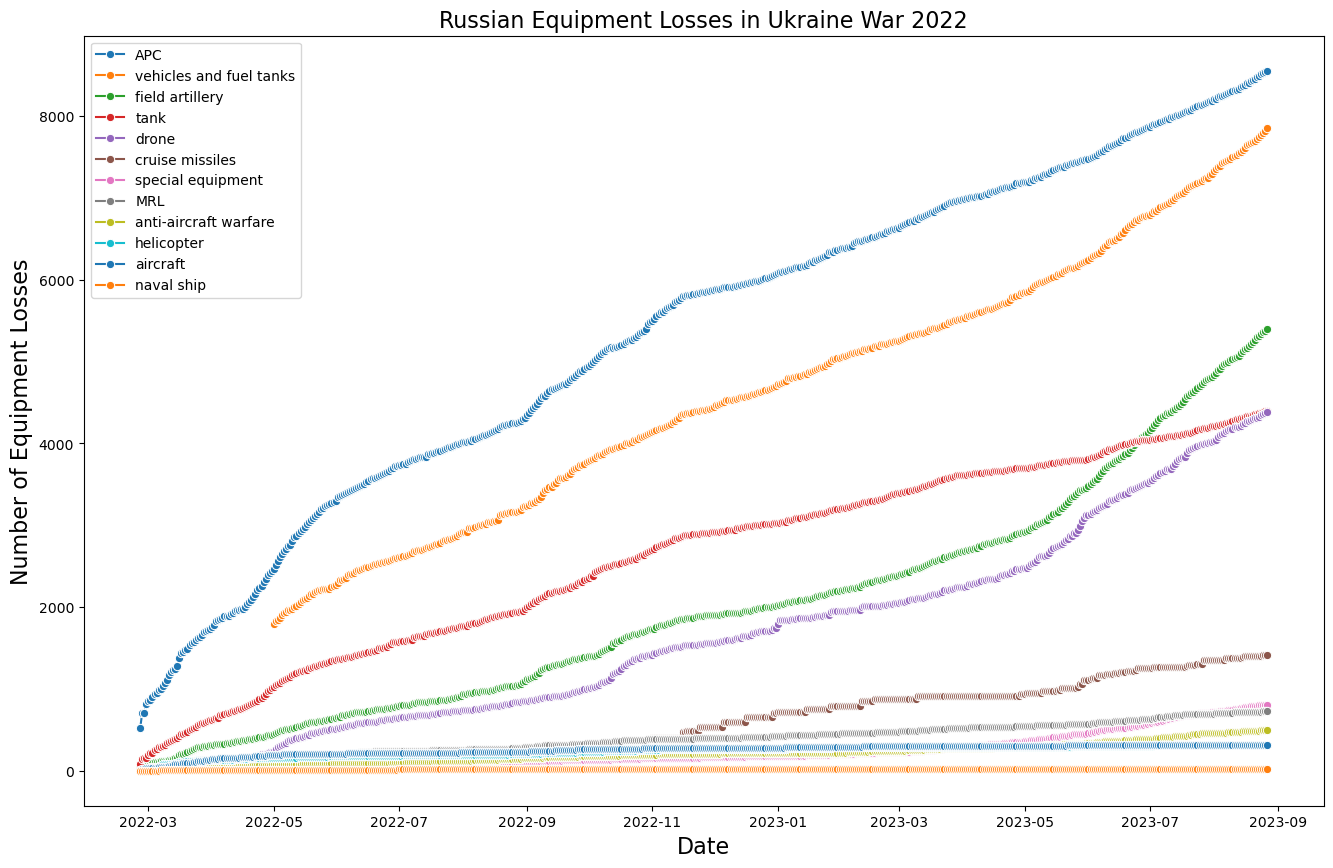

In [22]:
plt.figure(figsize=(16,10))

for equipment in equipment_names_ranked_list:
    sns.lineplot(x='date', y=equipment, data=russia_losses_equipment, marker='o')

plt.xlabel('Date',size=16)
plt.ylabel('Number of Equipment Losses',size=16)
plt.title('Russian Equipment Losses in Ukraine War 2022', size=16)
plt.legend(labels=equipment_names_ranked_list)

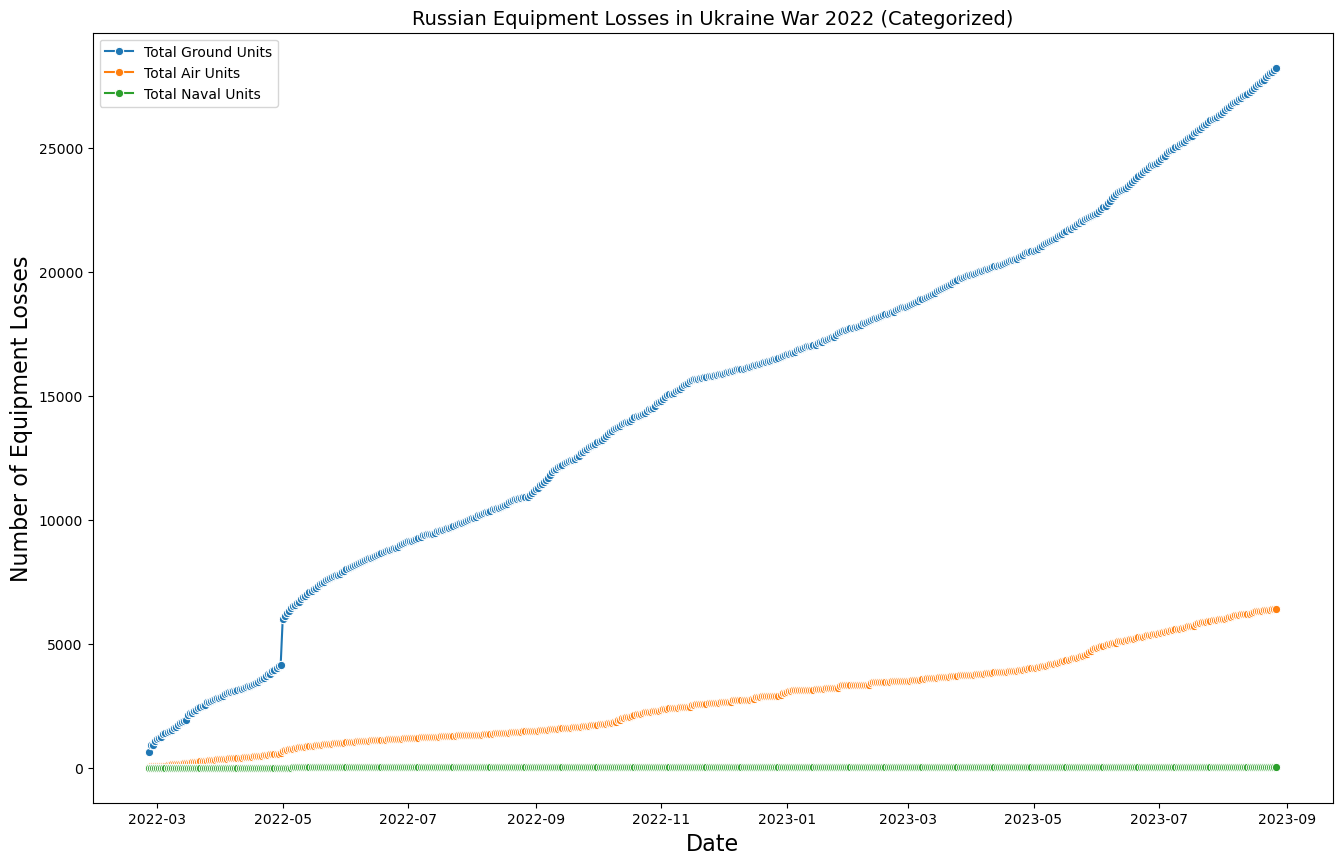

In [23]:
categorized_equipment = ['Total Ground Units', 'Total Air Units', 'Total Naval Units']

plt.figure(figsize=(16,10))

for unit in categorized_equipment:
    sns.lineplot(x='date', y=unit, data=russia_losses_equipment, marker='o')

plt.xlabel('Date',size=16)
plt.ylabel('Number of Equipment Losses',size=16)
plt.title('Russian Equipment Losses in Ukraine War 2022 (Categorized)', size=14)
plt.legend(labels=categorized_equipment)

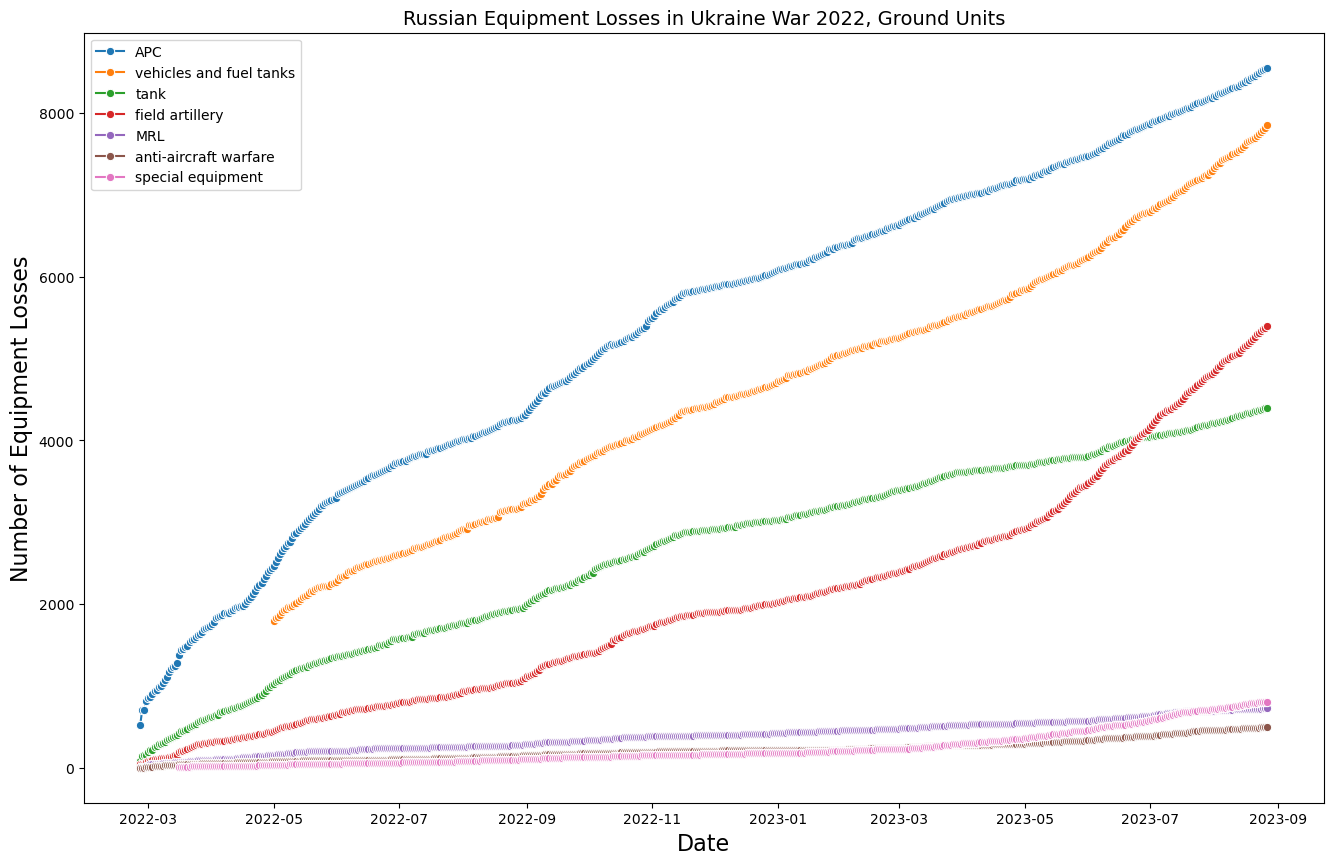

In [24]:
plt.figure(figsize=(16,10))

for unit in ground_units:
    sns.lineplot(x='date', y=unit, data=russia_losses_equipment, marker='o')

plt.xlabel('Date',size=16)
plt.ylabel('Number of Equipment Losses',size=16)
plt.title('Russian Equipment Losses in Ukraine War 2022, Ground Units', size=14)
plt.legend(labels=ground_units)

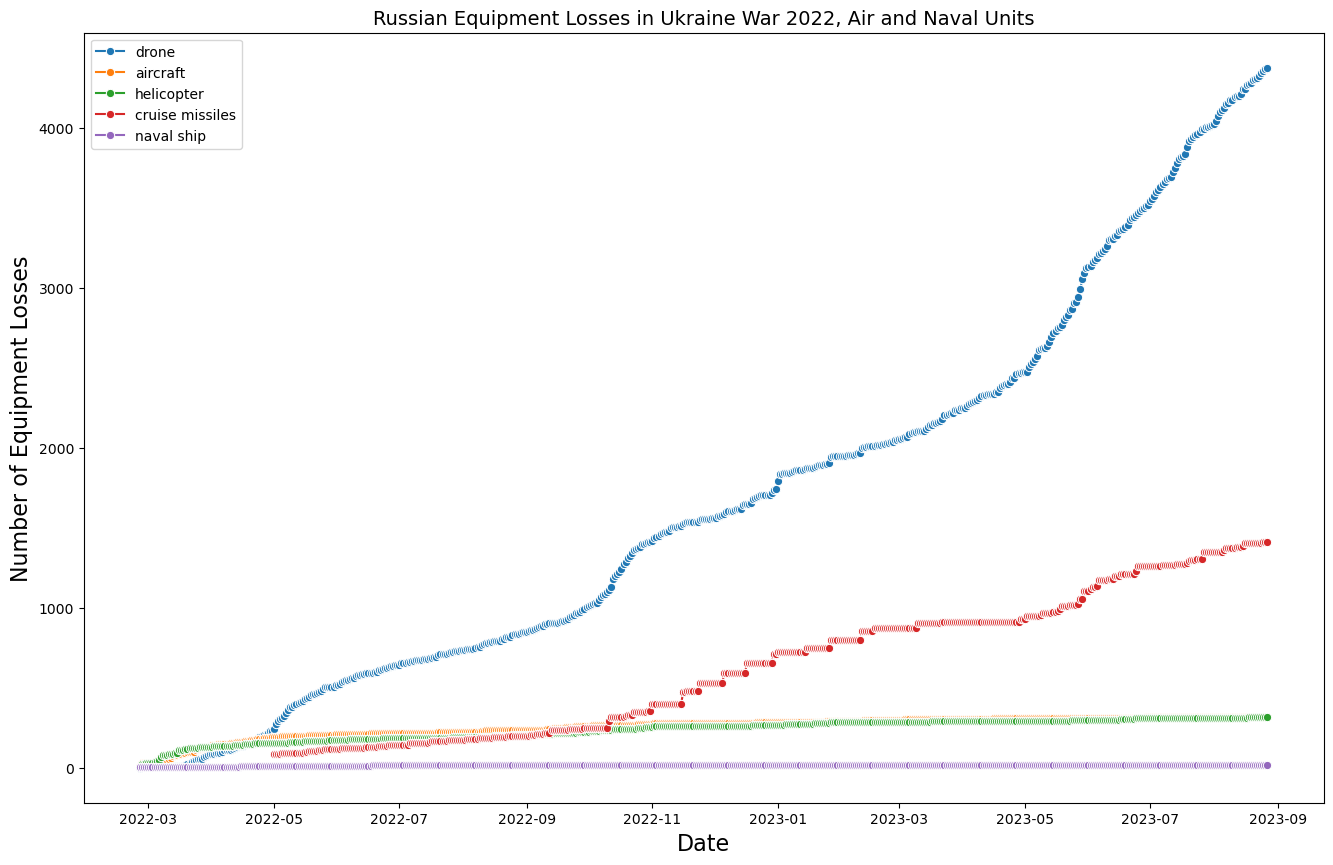

In [25]:
plt.figure(figsize=(16,10))

for unit in air_and_naval_units:
    sns.lineplot(x='date', y=unit, data=russia_losses_equipment, marker='o')

plt.xlabel('Date',size=16)
plt.ylabel('Number of Equipment Losses',size=16)
plt.title('Russian Equipment Losses in Ukraine War 2022, Air and Naval Units', size=14)
plt.legend(labels=air_and_naval_units)

In [28]:
russia_losses_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        549 non-null    object 
 1   day         549 non-null    int64  
 2   personnel   549 non-null    int64  
 3   personnel*  549 non-null    object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 21.6+ KB


In [29]:
russia_losses_personal

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0
...,...,...,...,...,...
544,2023-08-23,546,258820,about,NaN
545,2023-08-24,547,259160,about,NaN
546,2023-08-25,548,259630,about,NaN
547,2023-08-26,549,260270,about,NaN


In [31]:
last_index = len(russia_losses_personal.index) - 1
latest_personnel_df = russia_losses_personal.loc[last_index,["personnel", "POW"]]
latest_personnel_df.head()

personnel    260820
POW             NaN
Name: 548, dtype: object

In [32]:
#Creating pie chart containing percentages of russia personnel losses
plt.figure(figsize=(8,8))
fig = px.pie(latest_personnel_df, title=f'Percentages of Cumulated Russian Personnel Losses in Ukraine War\n(as of {last_date})', values=latest_personnel_df.values, names=["Killed in action","Prisoner of War"])
fig.show()

<Figure size 800x800 with 0 Axes>

I think that is all. Lets hope this war will end soon. My heart goes to all the people who have been affected by this war.